# Lista 5

## Uczenie maszynowe i sztuczna inteligencja

## Wstęp
Na tej liście przejdziemy już do wykorzystywania bardziej zaawansowanych sieci neuronowych w tym konwolucyjnych. Do konstrukcji sieci skorzystamy z Keras'a.

# Zadanie 1 (15pt)

W celu zaliczenia zadania należy uzupełnić wszystkie brakujące elementu kodu, wykonać wszystkie polecenia i wyuczyć model.



### **1. Stworzenie sieci konwolucyjnej (splotowej) i zapobieganie jej przeuczeniu z wykorzystaniem różnych metod przeciwdziałania temu zjawisku**

W pierwszym etapie przygotujmy dane do treningu - wykorzystamy zbiór Fashion MNIST.

> [Zbiór Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

Wczytaj zbiór danych Fashion MNIST. Ze zbioru testowego wyodrębnij 50% danych - zbiór walidacyjny.

In [1]:
# wyświetlanie wszystkich wyników z komórki (nie trzeba print(...))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist


# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split the test data into test and validation sets (50% each)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Display the shapes of the datasets to verify the split
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape



4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (5000, 28, 28), (5000,), (5000, 28, 28), (5000,))

Dostosujmy kształt danych wejściowych.

In [3]:
# uzupełnij kod
# Reshape the data
X_train = x_train.reshape(-1, 28, 28, 1)
X_val = x_val.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)

# Print the new shapes to verify
X_train.shape, X_val.shape, X_test.shape


((60000, 28, 28, 1), (5000, 28, 28, 1), (5000, 28, 28, 1))

Zdefiniujmy teraz nasz model sieci konwolucyjnej.

In [4]:
import tensorflow as tf
no_of_classes = 10
(img_width, img_height, img_depth)  = (28, 28, 1)

# definicja modelu
model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu',
                           input_shape=(img_width, img_height, img_depth), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
  ])

model_simple.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# wyświetlenie architektury
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

W ostatnim etapie zdefiniujmy hiperparametry oraz rozpocznijmy uczenie modelu na danych treningowych.

In [5]:
# wybór parametrów uczenia
batch_size = 32
epochs = 10
learning_rate = 0.01

In [6]:
# trening modelu
history_simple = model_simple.fit(X_train, y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(X_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.7044 - accuracy: 0.8296 - val_loss: 0.4080 - val_accuracy: 0.8626
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3130 - accuracy: 0.8848 - val_loss: 0.3386 - val_accuracy: 0.8816
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2715 - accuracy: 0.8999 - val_loss: 0.3243 - val_accuracy: 0.8840
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2451 - accuracy: 0.9076 - val_loss: 0.3151 - val_accuracy: 0.8896
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2213 - accuracy: 0.9169 - val_loss: 0.2906 - val_accuracy: 0.8958
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2001 - accuracy: 0.9258 - val_loss: 0.2966 - val_accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1802 - accuracy: 0.9324 - val_loss: 0.3082 -

Wyświetl na jednym wykresie, wykorzystując historię treningu modelu, jak
 zmieniała się dokładność dla danych treningowych i walidacyjnych. Czy
da się zauważyć na wykresie jakąś zależność? Czy trening przebiegł w
sposób, jaki byśmy oczekiwali?

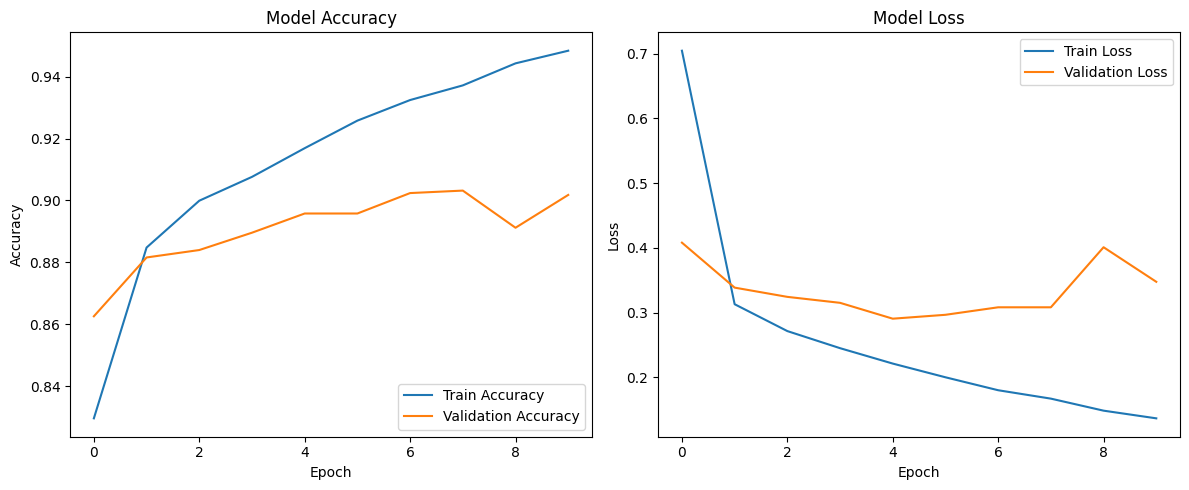

In [7]:
# tutaj umieść kod
import matplotlib.pyplot as plt

# Plotting training and validation accuracy and loss
def plot_history(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history_simple)


W celu poprawy wyników, które uzyskujemy oraz dodatkowo - aby zapobiegać nadmiernemu dopasowaniu do danych treningowych i uzyskiwaniu dobrej generalizacji, sprawdźmy kilka technik, które pomagają w przeciwdziałaniu przeuczeniu modelu.

Pierwszą techniką będzie **normalizacja danych**. W tym przypadku przeskalujmy dane wejściowe do zakresu od 0 do 1.

Wykorzystując jedną z warstw przetwarzania wstępnego danych, uzupełnij
poniższy kod tak, aby stworzyć możliwość normalizacji danych do zakresu
0-1.

In [12]:
# tutaj umieść rozwiązanie
rescale = tf.keras.layers.Rescaling(1./255, input_shape=(img_width, img_height, img_depth))


Kolejną techniką, która wspomaga przeciwdziałanie przeuczeniu modelu, jest **augmentacja danych**.
 W szczególności powinna być stosowana, jeśli nasz zbiór danych zawiera
mało przykładów treningowych - model nie może się uczyć uogólnień, które
 mógłby wykorzystać przy przetwarzaniu nowych danych. Stosując
augmentację, sieć nie zobaczy tego samego obrazu dwukrotnie, jednak
obrazy będą wyglądały wiarygodnie i będą do siebie zbliżone, więc będzie
 ona w stanie zwrócić uwagę na więcej aspektów przetwarzanych danych i tworzyć lepsze uogólnienia.

Wykorzystując dostępne warstwy przetwarzania wstępnego w pakiecie
Keras, stwórz model sekwencyjny, zawierający minimum trzy operacje na
obrazie (np. powiększenie, obrót itp.). Wykorzystując dowolny obraz ze
zbioru testowego, pokaż trzykrotne wywołanie tego modelu na tym samym
obrazie, aby zaprezentować losowość działania tych przekształceń.

In [9]:
#tutaj umieść rozwiązanie
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

Kolejną z technik wykorzystywaną do zmniejszania ryzyka przeuczenia się sieci jest *dropout*, który polega na losowym wybieraniu zadanej liczby cech wyjściowych warstwy podczas trenowania - wartości tych warstw zastępuje się zerami.

> [Dokumentacja - warstwa dropout](https://keras.io/api/layers/regularization_layers/dropout/)


Wykorzystując stworzone we wcześniejszych krokach: normalizację,
augmentację oraz dropout, stwórz nowy model modyfikując
strukturę modelu *model_simple*.
 Przed pierwszą warstwą splotową dodaj normalizację, a następnie
augmentację danych. Po każdej z warstw maxpooling dodaj dropout z
prawdopodobieństwem 0.2. Wytrenuj model na danych treningowych i
monitoruj jakie parametry uzyskiwane są dla danych walidacyjnych.
Wyświetl także wykres zmiany miary dokładności w trakcie kolejnych epok
uczenia dla danych walidacyjnych i treningowych. Czy zastosowanie tych technik przyniosło korzyść?

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 1.1414 - accuracy: 0.5773 - val_loss: 0.7674 - val_accuracy: 0.7090
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.8493 - accuracy: 0.6828 - val_loss: 0.7797 - val_accuracy: 0.7026
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.7746 - accuracy: 0.7086 - val_loss: 0.6697 - val_accuracy: 0.7426
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.7323 - accuracy: 0.7261 - val_loss: 0.6345 - val_accuracy: 0.7650
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.6981 - accuracy: 0.7411 - val_loss: 0.6154 - val_accuracy: 0.7712
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.6675 - accuracy: 0.7516 - val_loss: 0.6152 - val_accuracy: 0.7730
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.6509 - accuracy: 0.7584 - val_loss: 0.5438 -

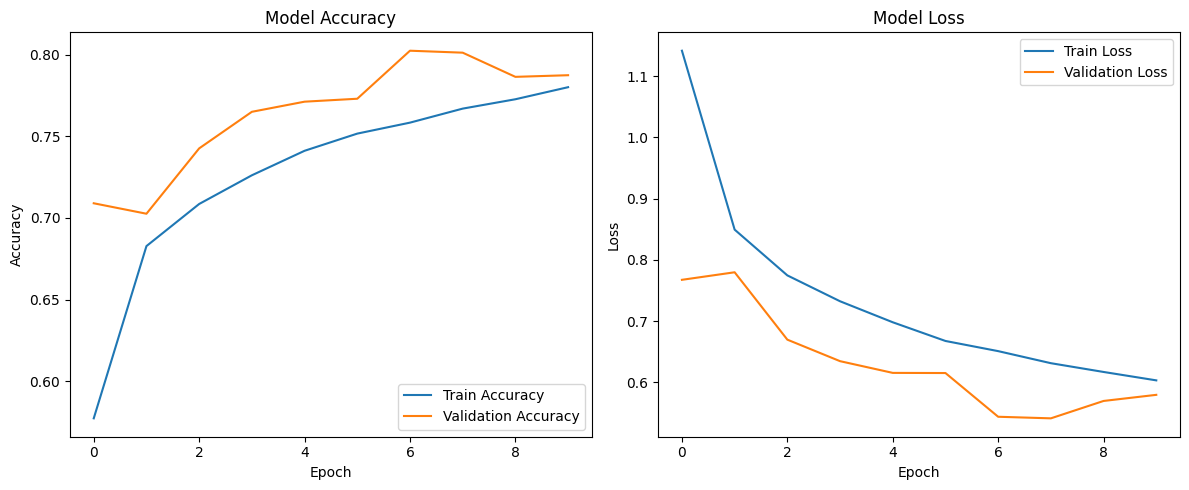

In [13]:
# tutaj umieść rozwiązanie
# Definicja modelu z warstwami augmentacji
no_of_classes = 10
(img_width, img_height, img_depth) = (28, 28, 1)

model_aug = tf.keras.Sequential([
    rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])

model_aug.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# Trening modelu z augmentacją danych
history_aug = model_aug.fit(X_train, y_train,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_val, y_val))

plot_history(history_aug)

Podobnie jak na poprzedniej liście (w pyTorch) wykorzystaj **wczesne zatrzymywanie** (ang. *earlystopping*). Proces uczenia zostanie przerwany w momencie, kiedy poprawianie się monitorowanej metryki przez określoną liczbę epok się nie zmienia. Takie podejście pozwala na brak konieczności ponownego treningu sieci ze zmniejszoną liczbą epok, kiedy początkowo ustawiona liczba epok jest zbyt duża i model zaczyna się przetrenowywać.

> [Dokumentacja - wczesne zatrzymanie](https://keras.io/api/callbacks/early_stopping/)


W połączeniu z wczesnym zatrzymywaniem treningu, stosuje się zazwyczaj wywołanie *ModelCheckpoint*, które umożliwia zapisanie stanu modelu podczas trenowania (można zapisać tylko najlepszą wersję, którą udało się uzyskać - z najlepszą wydajnością na koniec bieżącej epoki).

> [Dokumentacja - ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/)

Przeprowadź trening prostego modelu *model_simple*,
 zwiększając liczbę epok do 30 oraz wykorzystując wcześniejsze
zatrzymanie modelu, monitorując błąd na zbiorze walidacyjnym - jeśli nie
 zmienia się przez 4 epoki - zakończ uczenie. Dodatkowo wykorzystaj
zapisywanie modelu - zapisując tylko najlepiej wytrenowaną wersję
modelu, monitorując również błąd na zbiorze walidacyjnym. Ile epok
trwało uczenie modelu?

Epoch 1/30
1875/1875 [==============================] - 42s 21ms/step - loss: 1.1680 - accuracy: 0.5688 - val_loss: 0.8277 - val_accuracy: 0.6942
Epoch 2/30
   7/1875 [..............................] - ETA: 32s - loss: 0.9537 - accuracy: 0.6652

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 38s 21ms/step - loss: 0.8589 - accuracy: 0.6801 - val_loss: 0.7167 - val_accuracy: 0.7380
Epoch 3/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.7738 - accuracy: 0.7115 - val_loss: 0.8298 - val_accuracy: 0.6920
Epoch 4/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.7357 - accuracy: 0.7266 - val_loss: 0.6023 - val_accuracy: 0.7740
Epoch 5/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6968 - accuracy: 0.7423 - val_loss: 0.5891 - val_accuracy: 0.7868
Epoch 6/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.6682 - accuracy: 0.7520 - val_loss: 0.5811 - val_accuracy: 0.7886
Epoch 7/30
1875/1875 [==============================] - 39s 21ms/step - loss: 0.6497 - accuracy: 0.7613 - val_loss: 0.5612 - val_accuracy: 0.7962
Epoch 8/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.6293 - accuracy: 0.7673 - val_loss: 0.5783 - val_accura

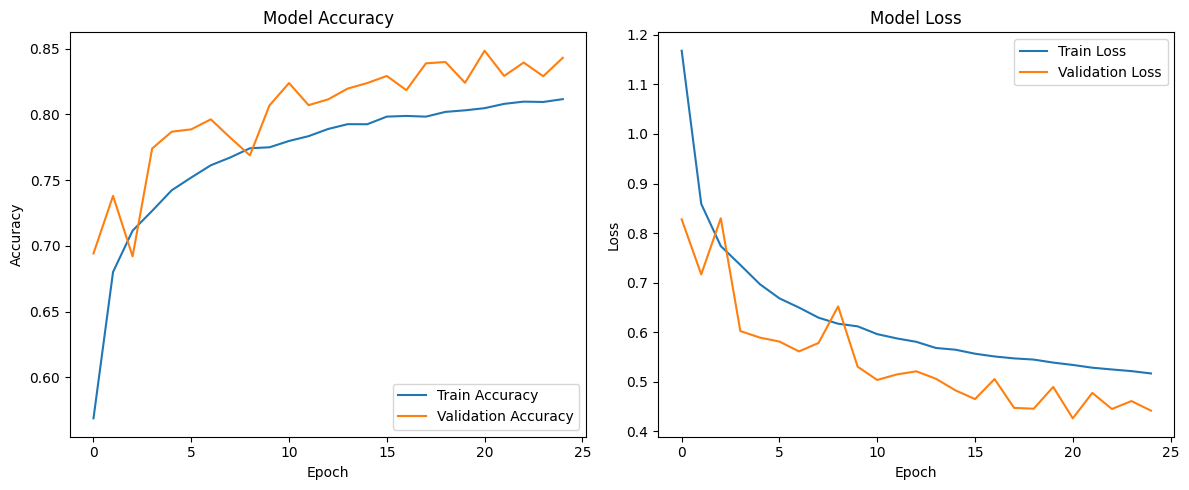

In [15]:
# tutaj umieść rozwiązanie
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Definicja modelu
no_of_classes = 10
(img_width, img_height, img_depth) = (28, 28, 1)

model_simple = tf.keras.Sequential([
    rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(8, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  # spłaszczenie danych do wykorzystania warstwy gęstej
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])

model_simple.compile(
    # wybór optymalizatora
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # miara, którą chcemy monitorować
    metrics=['accuracy']
)

# Callbacki do wczesnego zatrzymywania i zapisywania najlepszego modelu
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Trening modelu z wczesnym zatrzymywaniem i zapisywaniem najlepszego modelu
history_simple = model_simple.fit(X_train, y_train,
                                  epochs=30,
                                  batch_size=32,
                                  validation_data=(X_val, y_val),
                                  callbacks=[early_stopping, model_checkpoint])
plot_history(history_simple)

### **2. Uczenie transferowe**

W uczeniu transferowym wykorzystuje się wiedzę zdobytą przy rozwiązywaniu jednego problemu (na przykład klasyfikacji różnych gatunków zwierząt) i zastosowaniu jej do innego, powiązanego z nim problemu (na przykład klasyfikacja ras konkretnego gatunku).

Mając mały zbiór danych lub mając małe zasoby obliczeniowe - warto zastosować technikę uczenia transferowego.

Model, który został wcześniej przetrenowany z wykorzystaniem dużego zbioru danych, staje się punktem startowym w uczeniu innych zadań, na przykład klasyfikacji obrazu.

Wykorzystując zbiór danych Recyclable Materials , który zawiera
 282 obrazów należące do 6 klas, wczytaj dane z podziałem na zbiór
treningowy i walidacyjny (zbiór walidacyjny wyodrębnij ze zbioru
treningowego - 20%). Etykiety powinny być generowane na podstawie
struktury katalogów, a rozdzielczość obrazów - 224x224 piksele.

> Dataset: https://www.kaggle.com/datasets/minhoheo/recyable-materials ([local copy)](https://cs.pwr.edu.pl/zawada/umsi/download/data)

> Dokumentacja: [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 274 files belonging to 6 classes.
Using 220 files for training.
Found 274 files belonging to 6 classes.
Using 54 files for validation.


<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'plastic')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'plastic')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'glass')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'plastic')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'paper')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'plastic')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'plastic')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'can')

(-0.5, 223.5, 223.5, -0.5)

Text(0.5, 1.0, 'plastic')

(-0.5, 223.5, 223.5, -0.5)

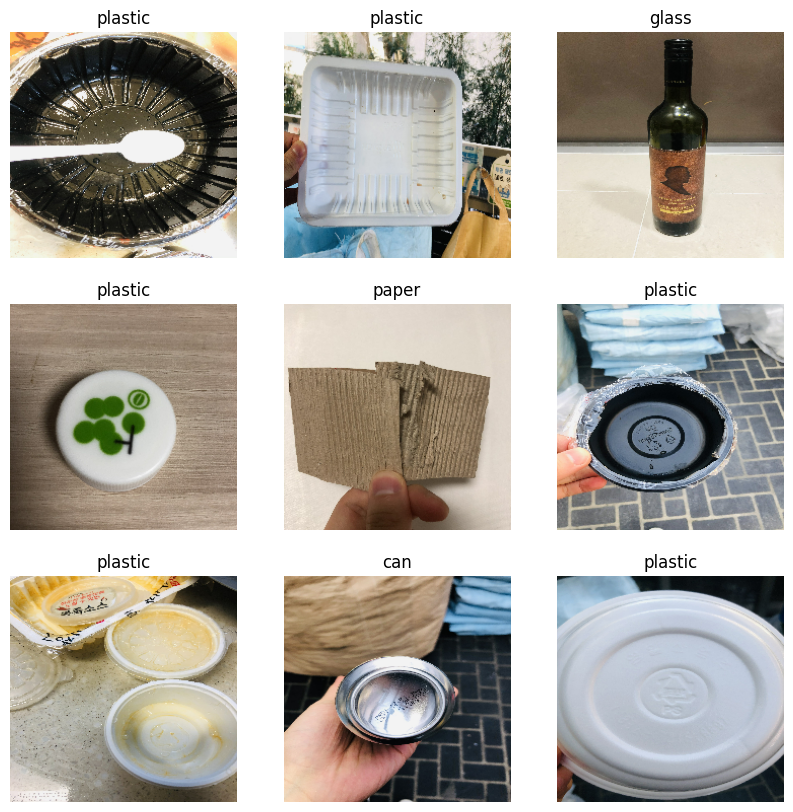

Number of training batches: 7
Number of validation batches: 2
Class names: ['can', 'glass', 'paper', 'plastic', 'plastic_bag', 'styrofoam']


In [17]:
# uzupełnij kod poniżej
# train_dataset i val_dataset
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Ścieżka do katalogu z danymi
data_dir = '/content/drive/MyDrive/recyclable_materials'

# Wczytanie zbioru treningowego z podziałem na treningowy i walidacyjny
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

# Wyświetlenie przykładowych obrazów ze zbioru treningowego
import matplotlib.pyplot as plt

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Informacje o zbiorach danych
print(f'Number of training batches: {tf.data.experimental.cardinality(train_dataset)}')
print(f'Number of validation batches: {tf.data.experimental.cardinality(val_dataset)}')
print(f'Class names: {class_names}')


In [18]:
mobilenet_base_scratch = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=None)

mobilenet_base_scratch.trainable = True

mobilenet_base_scratch.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

Dostosujmy dane do użycia ich w tworzonym modelu - normalizacja danych do zakresu [-1,1], dodanie augmentacji.

In [19]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ])

In [20]:
input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_base_scratch(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm_scratch = tf.keras.Model(input, output)

adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
mobilenet_pm_scratch.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = adam,
    metrics=['accuracy'])
print("Output shape:", output.shape)
mobilenet_pm_scratch.summary()

Output shape: (None, 6)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                     

W kolejnym kroku uruchamiamy trening modelu - 15 epok, wykorzystując do walidacji wydzielone dane walidacyjne.

In [21]:
epochs_mobilenet = 15
history_scratch = mobilenet_pm_scratch.fit(
    train_dataset,
    epochs=epochs_mobilenet,
    validation_data=val_dataset)

Epoch 1/15
7/7 [==============================] - 140s 14s/step - loss: 1.7305 - accuracy: 0.2500 - val_loss: 1.7861 - val_accuracy: 0.1852
Epoch 2/15
7/7 [==============================] - 61s 6s/step - loss: 1.6889 - accuracy: 0.3364 - val_loss: 1.7954 - val_accuracy: 0.2593
Epoch 3/15
7/7 [==============================] - 65s 7s/step - loss: 1.5820 - accuracy: 0.3455 - val_loss: 1.6929 - val_accuracy: 0.2778
Epoch 4/15
7/7 [==============================] - 63s 7s/step - loss: 1.6062 - accuracy: 0.2955 - val_loss: 1.6298 - val_accuracy: 0.2963
Epoch 5/15
7/7 [==============================] - 65s 7s/step - loss: 1.5503 - accuracy: 0.3727 - val_loss: 1.5881 - val_accuracy: 0.3333
Epoch 6/15
7/7 [==============================] - 64s 7s/step - loss: 1.5133 - accuracy: 0.3909 - val_loss: 1.6315 - val_accuracy: 0.3333
Epoch 7/15
7/7 [==============================] - 63s 7s/step - loss: 1.5843 - accuracy: 0.3545 - val_loss: 1.5798 - val_accuracy: 0.3704
Epoch 8/15
7/7 [================

Wyświetlmy na wykresie zmianę dokładności klasyfikacji dla danych walidacyjnych oraz testowych.

Text(0.5, 0.98, 'Zmiana dokładności w trakcie treningu')

Text(0.5, 0, 'epoka')

Text(0, 0.5, 'miara - dokładność')

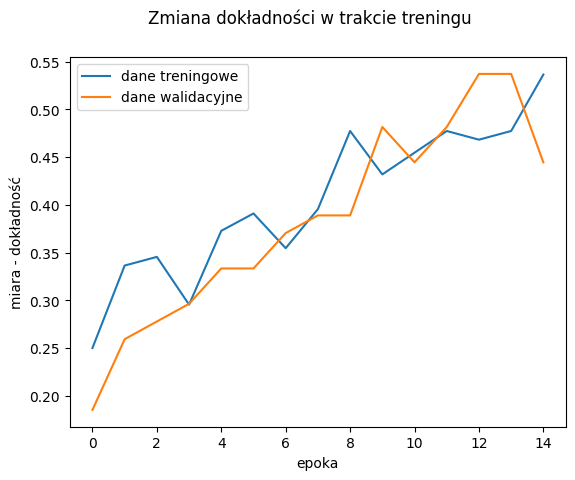

In [22]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.suptitle("Zmiana dokładności w trakcie treningu")
figure_acc = figure.add_subplot(1,1,1)
figure_acc.set_xlabel('epoka')
figure_acc.set_ylabel('miara - dokładność')
plt.plot(history_scratch.history['accuracy'])
plt.plot(history_scratch.history['val_accuracy'])
plt.legend(['dane treningowe', 'dane walidacyjne'])

plt.show()

Stwórz nowy model, wykorzystując model MobileNetV2 z wagami ImageNet,
ale dla pierwszych 50 warstw zablokuj możliwość ich treningu. Podobnie
jak w poprzednim podejściu wytrenuj go, wykorzystującą tę samą ilość
epok. Wyświetl wykres zmiany dokładności klasyfikacji dla danych
treningowych i testowych oraz porównaj uzyskane wyniki z podejściem
trenowania tego modelu od podstaw.

Found 282 files belonging to 6 classes.
Using 226 files for training.
Found 282 files belonging to 6 classes.
Using 56 files for validation.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/15
8/8 [==============================] - 68s 4s/step - loss: 1.7316 - accuracy: 0.3451 - val_loss: 1.0934 - val_accuracy: 0.6607
Epoch 2/15
8/8 [==============================] - 43s 4s/step - loss: 1.0651 - accuracy: 0.6195 - val_loss: 0.8155 - val_accuracy: 0.6964
Epoch 3/15
8/8 [==============================] - 42s 3s/step - loss: 0.7272 - accuracy: 0.7434 - val_loss: 0.6981 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 41s 3s/step - loss: 0.5104 - accuracy: 0.8540 - val_loss: 0.6155 - val_accuracy: 0.7857
Epoch 5/15
8/8 [==============================] - 42s 3s/step - loss: 0.3636 - accuracy: 0.8938 - val_loss: 0.5205 - val_accuracy: 0.8036
Epoch 6/15
8/8 [==============================] - 42s 3s/step - loss: 0.2617 - accuracy: 0.9204 - val_loss

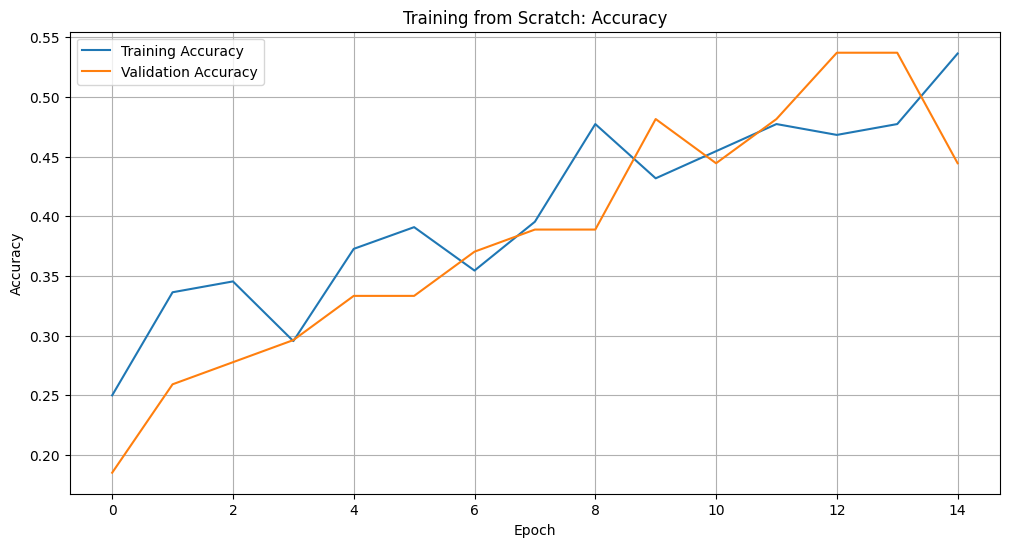

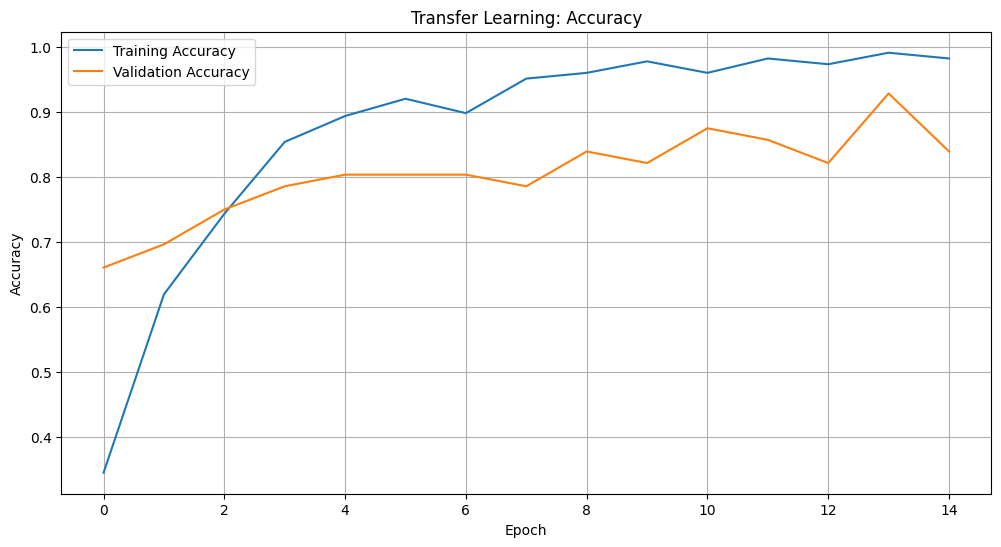

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing import image_dataset_from_directory

# Wczytanie danych
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int'
)

# Definicja nowego modelu MobileNetV2 z wstępnie wytrenowanymi wagami ImageNet
mobilenet_base_pretrained = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

mobilenet_base_pretrained.trainable = True

# Blokowanie pierwszych 50 warstw modelu
for layer in mobilenet_base_pretrained.layers[:50]:
    layer.trainable = False

# Dodanie warstw przetwarzania wstępnego, augmentacji i głównej struktury modelu
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
data_augm = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

input = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = data_augm(x)
x = mobilenet_base_pretrained(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(6)(x)

mobilenet_pm_pretrained = tf.keras.Model(input, output)

# Kompilacja modelu
adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
mobilenet_pm_pretrained.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=adam,
    metrics=['accuracy']
)

# Trening modelu
epochs_mobilenet = 15
history_pretrained = mobilenet_pm_pretrained.fit(
    train_dataset,
    epochs=epochs_mobilenet,
    validation_data=val_dataset
)

# Funkcja do wyświetlania wyników treningu
def plot_history(history, title='Model Training and Validation Accuracy'):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Wyświetlenie wyników treningu dla modelu trenowanego od podstaw
plot_history(history_scratch, title='Training from Scratch: Accuracy')

# Wyświetlenie wyników treningu dla modelu z uczeniem transferowym
plot_history(history_pretrained, title='Transfer Learning: Accuracy')


# Zadanie 2 (10pt)

Zaprogramuj i pokaż wykorzystanie klasycznych architektur sieci tzw. backbone


## Klasyczne sieci typu backbone

Sieci neuronowe znalazły zastosowanie w wielu różnych klasach problemach nierzadko znacznie przewyższając osiągnięciami poprzednio wykorzystywane modele. Bardziej wymagające problemy pociągnęły za sobą bardziej wyrafinowane modele neuronowe, które natomiast stawały się większe pod względem liczby parametrów, warstw i stopnia zaawansowania.

Jednym z bardziej eksplorowanych działów głębokiego uczenia jest wykorzystanie modeli neuronowych w zastosowaniach wizyjnych. Poniżej przedstawiony został graf zależności pomiędzy rozmiarami popularnych modeli neuronowych wykorzystywanych najczęściej w widzeniu komputerowym a ich trafnością klasyfikacji (zastosowanie: klasyfikacja obrazów, uczenie nadzorowane).

Źródło: "An Analysis of Deep Neural Network Models for Practical Applications", Alfredo Canziani, Adam Paszke, Eugenio Culurciello



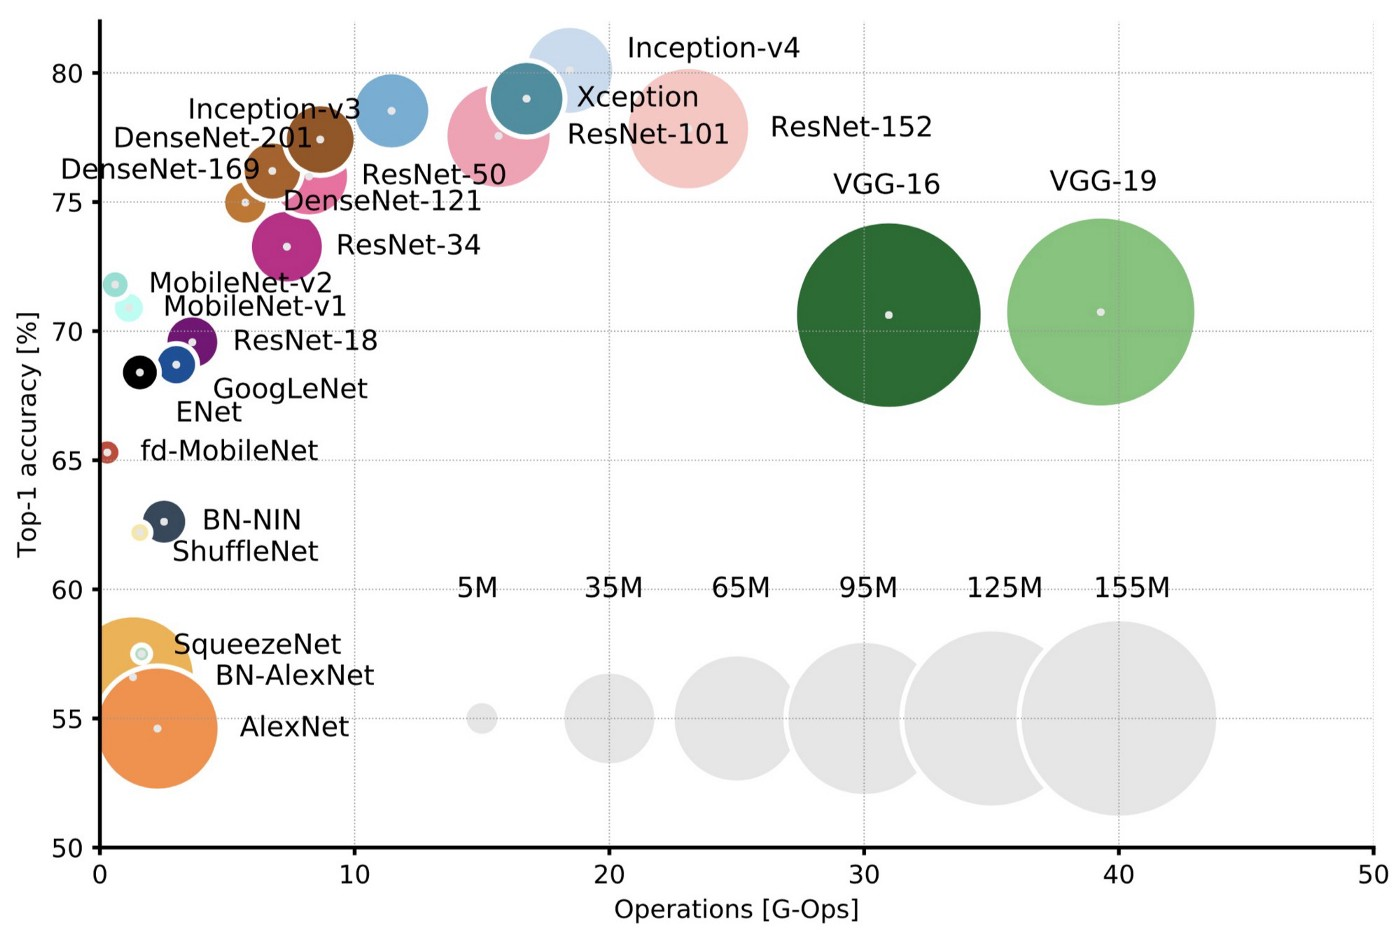

Modele liczące miliony operacji i miliony parametrów okazały się bardzo skutecznymi narzędziami do takich problemów jak klasyfikacja, detekcja obiektów czy tłumaczenie tekstów. Jednak ich rozmiar pociąga niewspółmiernie rosnącą złożoność obliczeniową, czasową i pamięciową w stosunku do skuteczności działania. Stąd, powstało zapotrzebowanie na opracowywanie nie głębszych, a *inteligentniejszych* modeli neuronowych. Takich, które posiadają względnie niską złożoność obliczeniową i osiągają podobne lub lepsze wyniki niż dotychczas wykorzystywane.

Ponieważ opracowanie zupełnie nowego modelu, bijącego poprzednie pod względem skuteczności działania jest bardzo trudne i kosztowne, rozwój sieci zaczął opierać się o stopniowy rozwój przyrostowy do istniejących już modeli. Aby nie wykonywać za każdym razem procesu uczenia tych samych modeli neuronowych zaczęto wykorzystywać poprzednio wyuczone modele, tym samym skupiając się wokół tematyki **transfer learning** oraz **fine-tuning**.

Komponenty neuronowe na których budowane są nowe funkcjonalności nazywane są **backbone-ami**, wykorzystanie modeli neuronowych nauczonych na **innej klasie problemu** do rozwiązania nowego problemy nazywa się **transfer learningiem**, natomiast proces dostrajania wstępnie nauczonych modeli neuronowych nazywa się **fine-tuningiem**.




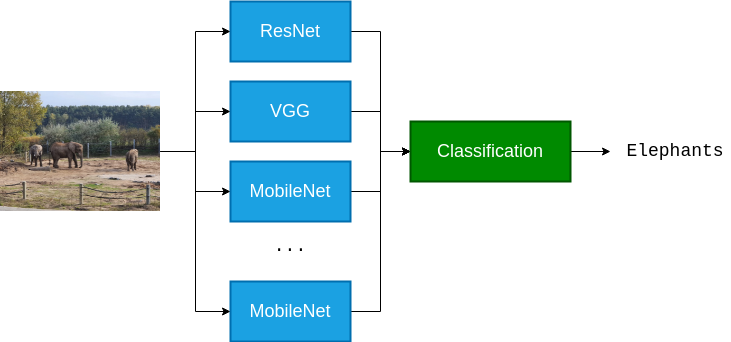

Takie modele jak ResNet, VGG, BERT czy Faster-RCNN są w praktyce bardzo
często wykorzystywane, nawet wielokrotnie w jednym dużym modelu
neuronowym. Stąd, popularne biblioteki do uczenia maszynowego zazwyczaj
zawierają gotową implementację niektórych z nich. Dodatkowo, popularne
stały się takie repozytoria jak TensorHub, HuggingFace czy ModelZoo do
współdzielenia istniejących implementacji popularnych modeli neuronowych
 razem z ich pretrenowanymi wersjami.

## Keras

Keras w swojej implementacji zawiera gotowe definicje popularnych modeli (głównie do przetwarzania wizyjnego, w szczególności klasyfikacji) wraz z możliwością pobrania popularnych pretrenowanych wersji modeli.

Do wykonania tego zadania wykorzystaj TensorFlow oraz jego dostosowany moduł.

Keras zawiera wewnętrzny moduł `applications`, w którym można znaleźć definicje klas popularnych modeli neuronowych. Co jest bardzo ważne, modele te dziedziczą po klasie `tf.keras.Model`, dzięki czemu możliwa jest łatwa integracja własnego kodu.

In [24]:
# model = tf.keras.applications.ResNet50V2(weights=None)
# model = tf.keras.applications.NASNetLarge(weights=None)
# model = tf.keras.applications.DenseNet121(weights=None)
# model = tf.keras.applications.VGG16(weights=None)
# model = tf.keras.applications.MobileNetV2(weights=None)

Modele zaimplementowane w Keras posiadają zestaw parametrów wejściowych, z których najważniejsze to:
- `weights` - w przypadku podania tego parametru Keras pobierze pretrenowany model na podanym zbiorze danych (obecnie możliwe wartości to `None` - czysty model oraz `imagenet` - model pretrenowany na zbiorze ImageNet),
- `include_top` - określenie czy będzie wykorzystywany końcowy moduł modelu odpowiedzialny za klasyfikację obrazów, w przypadku `include_top=False` model będzie zwracał **wektory osadzenia (embeddings)** obrazów,

In [25]:
!wget https://drive.google.com/uc?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj -O elephants.jpg

--2024-05-26 22:20:12--  https://drive.google.com/uc?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj
Resolving drive.google.com (drive.google.com)... 142.250.101.101, 142.250.101.139, 142.250.101.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj [following]
--2024-05-26 22:20:12--  https://drive.usercontent.google.com/download?id=1jq6s6lP6B6CeqTDaa5uOrPy5ErSASiBj
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203797 (199K) [image/jpeg]
Saving to: ‘elephants.jpg’

elephants.jpg       100%[===================>] 199.02K  --.-KB/s    in 0.05s   

2024-05-26 22:20:13 (4.08 MB/s) - ‘elephant

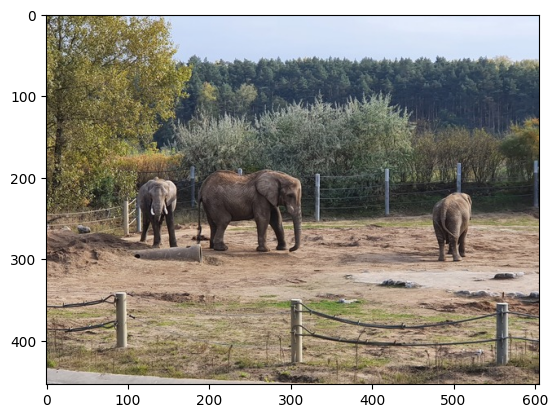

In [26]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
elephants = cv2.imread('./elephants.jpg')
elephants = cv2.cvtColor(elephants, cv2.COLOR_BGR2RGB)
elephants = tf.image.convert_image_dtype(elephants, tf.float32)
plt.imshow(elephants)

Np. dla ResNet50v2 sprawdzać możemy tak
```python
tf.keras.applications.resnet_v2.decode_predictions(output.numpy())
```

W tym zadaniu należy wykorzystać każdy z modeli `ResNet50V2`, `VGG16`, `MobileNetV2`, ... przetrenowany na zbiorze `ImageNet` i porównać te modele na zdjęciu 'elephants' i kilku innych wybranych dowolnie z sieci/aparatu itp. Następnie wykonać podobny diagram/tabelkę porównującą złożoność modeli. Zbiór testowy nie musi być duży, ale dobrze żeby miał kilka kategorii.

<Figure size 1000x1000 with 0 Axes>

<Axes: >

(-0.5, 223.5, 223.5, -0.5)

<Axes: >

(-0.5, 223.5, 223.5, -0.5)

<Axes: >

(-0.5, 223.5, 223.5, -0.5)

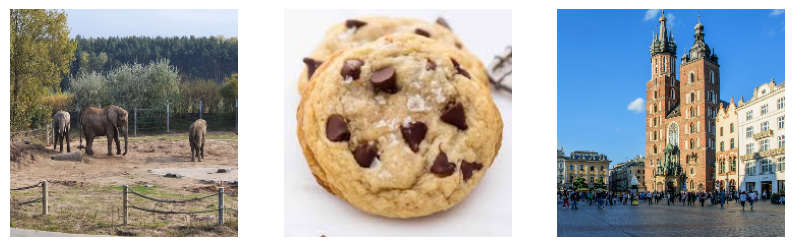

In [33]:
# tutaj wpisz rozwiązanie
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Funkcja do wczytywania i przetwarzania obrazów
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.expand_dims(image, 0)
    return image

# Ścieżki do wybranych obrazów
image_paths = ['elephants.jpg', 'cookie.jpg', 'krak.jpg']

# Wczytanie i przetworzenie obrazów
images = [load_and_preprocess_image(path) for path in image_paths]
images2 = [load_and_preprocess_image(path, target_size=(331, 331)) for path in image_paths]

# Wyświetlenie obrazów
plt.figure(figsize=(10, 10))
for i, image in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(tf.squeeze(image))
    plt.axis('off')
plt.show()


In [35]:
# Funkcja do przewidywania etykiet obrazów za pomocą modelu
def predict_with_model(model, images, preprocess_input, decode_predictions):
    results = []
    for image in images:
        image = preprocess_input(image)
        predictions = model(image)
        decoded_predictions = decode_predictions(predictions.numpy())
        results.append(decoded_predictions)
    return results

# Modele do przetestowania
models = {
    'ResNet50V2': tf.keras.applications.ResNet50V2(weights='imagenet'),
    'VGG16': tf.keras.applications.VGG16(weights='imagenet'),
    'MobileNetV2': tf.keras.applications.MobileNetV2(weights='imagenet'),
    'NASNetLarge': tf.keras.applications.NASNetLarge(weights='imagenet'),
    'DenseNet121': tf.keras.applications.DenseNet121(weights='imagenet')
}

# Preprocessing functions and decode functions
preprocessing_functions = {
    'ResNet50V2': tf.keras.applications.resnet_v2.preprocess_input,
    'VGG16': tf.keras.applications.vgg16.preprocess_input,
    'MobileNetV2': tf.keras.applications.mobilenet_v2.preprocess_input,
    'NASNetLarge': tf.keras.applications.nasnet.preprocess_input,
    'DenseNet121': tf.keras.applications.densenet.preprocess_input
}

decode_functions = {
    'ResNet50V2': tf.keras.applications.resnet_v2.decode_predictions,
    'VGG16': tf.keras.applications.vgg16.decode_predictions,
    'MobileNetV2': tf.keras.applications.mobilenet_v2.decode_predictions,
    'NASNetLarge': tf.keras.applications.nasnet.decode_predictions,
    'DenseNet121': tf.keras.applications.densenet.decode_predictions
}

model_images = {
    'ResNet50V2': images,
    'VGG16': images,
    'MobileNetV2': images,
    'NASNetLarge': images2,
    'DenseNet121': images
}

# Przewidywanie etykiet za pomocą modeli
predictions = {}
for model_name, model in models.items():
    preprocess_input = preprocessing_functions[model_name]
    decode_predictions = decode_functions[model_name]
    predictions[model_name] = predict_with_model(model, model_images[model_name], preprocess_input, decode_predictions)

# Wyświetlenie wyników
for model_name, prediction in predictions.items():
    print(f"Results for {model_name}:")
    for i, pred in enumerate(prediction):
        print(f"Image {i + 1}:")
        for _, label, score in pred[0]:
            print(f"  {label}: {score:.4f}")
    print("\n")


Results for ResNet50V2:
Image 1:
  matchstick: 0.0379
  nematode: 0.0356
  web_site: 0.0341
  church: 0.0145
  digital_clock: 0.0119
Image 2:
  matchstick: 0.0481
  nematode: 0.0332
  web_site: 0.0274
  church: 0.0178
  vine_snake: 0.0161
Image 3:
  matchstick: 0.0442
  web_site: 0.0324
  nematode: 0.0284
  vine_snake: 0.0170
  church: 0.0159


Results for VGG16:
Image 1:
  matchstick: 0.0759
  nematode: 0.0479
  lighter: 0.0307
  digital_clock: 0.0297
  spotlight: 0.0239
Image 2:
  matchstick: 0.0762
  nematode: 0.0487
  lighter: 0.0305
  digital_clock: 0.0293
  spotlight: 0.0231
Image 3:
  matchstick: 0.0766
  nematode: 0.0484
  lighter: 0.0307
  digital_clock: 0.0298
  spotlight: 0.0235


Results for MobileNetV2:
Image 1:
  spotlight: 0.2592
  digital_clock: 0.0344
  matchstick: 0.0316
  theater_curtain: 0.0304
  lampshade: 0.0226
Image 2:
  spotlight: 0.2783
  matchstick: 0.0313
  digital_clock: 0.0312
  theater_curtain: 0.0248
  lampshade: 0.0235
Image 3:
  spotlight: 0.2861
  dig

Model complexity (number of parameters):
ResNet50V2: 25,613,800
VGG16: 138,357,544
MobileNetV2: 3,538,984
NASNetLarge: 88,949,818
DenseNet121: 8,062,504


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Number of Parameters')

Text(0.5, 1.0, 'Comparison of Model Complexity')

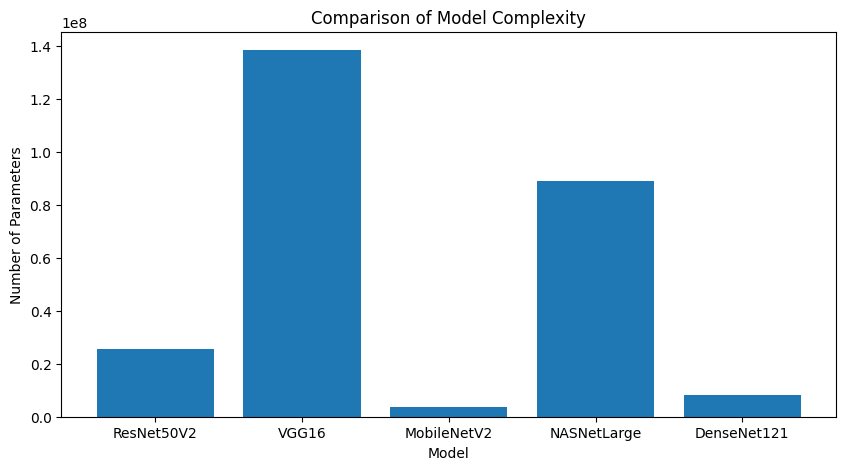

In [36]:
# Funkcja do uzyskania liczby parametrów modelu
def get_model_complexity(model):
    return model.count_params()

# Liczba parametrów w każdym modelu
model_complexity = {model_name: get_model_complexity(model) for model_name, model in models.items()}

# Wyświetlenie złożoności modeli
print("Model complexity (number of parameters):")
for model_name, params in model_complexity.items():
    print(f"{model_name}: {params:,}")

# Wykres porównania złożoności modeli
plt.figure(figsize=(10, 5))
plt.bar(model_complexity.keys(), model_complexity.values())
plt.xlabel('Model')
plt.ylabel('Number of Parameters')
plt.title('Comparison of Model Complexity')
plt.show()
